In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib
import pynance
import yfinance
import mplfinance as mpf
from src.quantitative_analysis import StockAnalysis

In [3]:
apple = pd.read_csv(r"..\data\yfinance_data\AAPL_historical_data.csv", parse_dates = ['Date'])
amazon = pd.read_csv(r"..\data\yfinance_data\AMZN_historical_data.csv", parse_dates = ['Date'])
google = pd.read_csv(r"..\data\yfinance_data\GOOG_historical_data.csv", parse_dates = ['Date'])
meta = pd.read_csv(r"..\data\yfinance_data\META_historical_data.csv", parse_dates = ['Date'])
microsoft = pd.read_csv(r"..\data\yfinance_data\MSFT_historical_data.csv", parse_dates = ['Date'])
nvidia = pd.read_csv(r"..\data\yfinance_data\NVDA_historical_data.csv", parse_dates = ['Date'])
tesla = pd.read_csv(r"..\data\yfinance_data\TSLA_historical_data.csv", parse_dates = ['Date'])

In [5]:
# EDA for apple

print(apple.shape)

print(apple.head(7))

# Data types
print(apple.dtypes)

# Info
print(apple.info())

# Describe summary statistics
print(apple.describe())

#Check for missing values
print(apple.isna().sum())

(10998, 9)
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   
5 1980-12-19  0.126116  0.126674  0.126116  0.126116   0.097223   48630400   
6 1980-12-22  0.132254  0.132813  0.132254  0.132254   0.101954   37363200   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close   

In [6]:
# EDA for Google

print(google.shape)

print(google.head(7))

# Data types
print(google.dtypes)

# Info
print(google.info())

# Describe summary statistics
print(google.describe())

#Check for missing values
print(google.isna().sum())

(5020, 9)
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   
5 2004-08-26  2.613952  2.688672  2.606729  2.687676   2.684621  142572401   
6 2004-08-27  2.692408  2.705360  2.632383  2.643840   2.640835  124826132   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close    

In [7]:
# EDA for Amazon

print(amazon.shape)

print(amazon.head(7))

# Data types
print(amazon.dtypes)

# Info
print(amazon.info())

# Describe summary statistics
print(amazon.describe())

#Check for missing values
print(amazon.isna().sum())

(6846, 9)
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4 1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   
5 1997-05-22  0.071875  0.072396  0.065625  0.069792   0.069792   235536000   
6 1997-05-23  0.070313  0.076042  0.066667  0.075000   0.075000   318744000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
C

In [8]:
# EDA for META

print(meta.shape)

print(meta.head(7))

# Data types
print(meta.dtypes)

# Info
print(meta.info())

# Describe summary statistics
print(meta.describe())

#Check for missing values
print(meta.isna().sum())

(2926, 9)
        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441  46704200   
1 2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087  81051600   
2 2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020  91631600   
3 2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143  57742500   
4 2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173  60512900   
5 2012-12-19  27.830000  28.219999  26.950001  27.410000  27.353790  61390300   
6 2012-12-20  27.490000  27.600000  27.129999  27.360001  27.303892  35574800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
Date            datetime64[ns]
Open                   float64
High                   float64
Low             

In [9]:
# EDA for Microsoft

print(microsoft.shape)

print(microsoft.head(7))

# Data types
print(microsoft.dtypes)

# Info
print(microsoft.info())

# Describe summary statistics
print(microsoft.describe())

#Check for missing values
print(microsoft.isna().sum())

(9672, 9)
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1 1986-03-14  0.097222  0.102431  0.097222  0.100694   0.062087   308160000   
2 1986-03-17  0.100694  0.103299  0.100694  0.102431   0.063158   133171200   
3 1986-03-18  0.102431  0.103299  0.098958  0.099826   0.061552    67766400   
4 1986-03-19  0.099826  0.100694  0.097222  0.098090   0.060482    47894400   
5 1986-03-20  0.098090  0.098090  0.094618  0.095486   0.058876    58435200   
6 1986-03-21  0.095486  0.097222  0.091146  0.092882   0.057270    59990400   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
C

In [10]:
# EDA for Nvidia
print(nvidia.shape)

print(nvidia.head(7))

# Data types
print(nvidia.dtypes)

# Info
print(nvidia.info())

# Describe summary statistics
print(nvidia.describe())

#Check for missing values
print(nvidia.isna().sum())

(6421, 9)
        Date      Open      High       Low     Close  Adj Close      Volume  \
0 1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1 1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2 1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3 1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4 1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   
5 1999-01-29  0.041536  0.041667  0.039583  0.039583   0.036307   244032000   
6 1999-02-01  0.039583  0.040625  0.039583  0.040365   0.037024   154704000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
C

In [11]:
# EDA for Tesla

print(tesla.shape)

print(tesla.head(7))

# Data types
print(tesla.dtypes)

# Info
print(tesla.info())

# Describe summary statistics
print(tesla.describe())

#Check for missing values
print(tesla.isna().sum())

(3545, 9)
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   
5 2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500   
6 2010-07-08  1.076000  1.168000  1.038000  1.164000   1.164000  115671000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
5        0.0           0.0  
6        0.0           0.0  
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close    

In [4]:
# Loading the stock data for analysis with the StockAnalysis class

apple_TA = StockAnalysis(ticker = 'AAPL', df=apple)
amazon_TA = StockAnalysis(ticker = 'AMZN', df=amazon)
google_TA = StockAnalysis(ticker = 'GOOG', df=google)
meta_TA = StockAnalysis(ticker = 'META', df=meta)
microsoft_TA = StockAnalysis(ticker = 'MSFT', df=microsoft)
nvidia_TA = StockAnalysis(ticker = 'NVDA', df=nvidia)
tesla_TA = StockAnalysis(ticker = 'TSLA', df=tesla)


Data for AAPL loaded and sorted by date successfully.
Data for AMZN loaded and sorted by date successfully.
Data for GOOG loaded and sorted by date successfully.
Data for META loaded and sorted by date successfully.
Data for MSFT loaded and sorted by date successfully.
Data for NVDA loaded and sorted by date successfully.
Data for TSLA loaded and sorted by date successfully.


In [5]:
# ================== Apple AAPL=====================

# Adjust prices for stock splits (if present)
apple_TA.adjust_for_splits()

# Calculate daily percentage change in closing price (returns)
apple_TA.compute_daily_returns()

# Add technical indicators (Moving Averages, RSI, MACD) using TA-Lib
apple_TA.add_technical_indicators()


Adjusted for stock splits for AAPL.
Daily returns computed for AAPL.
Technical indicators added for AAPL.


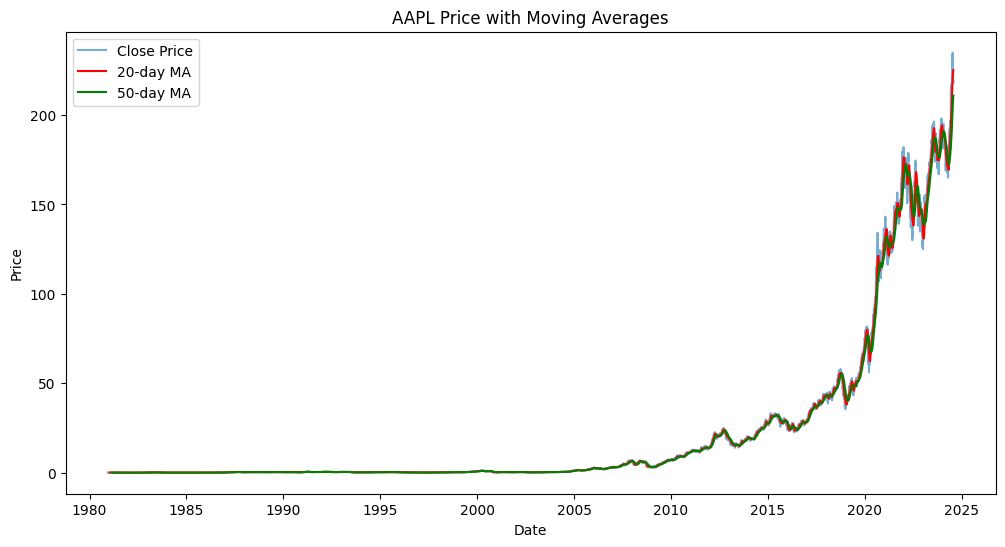

In [16]:
# Plot closing price with moving averages to identify trends
apple_TA.plot_price_and_ma()


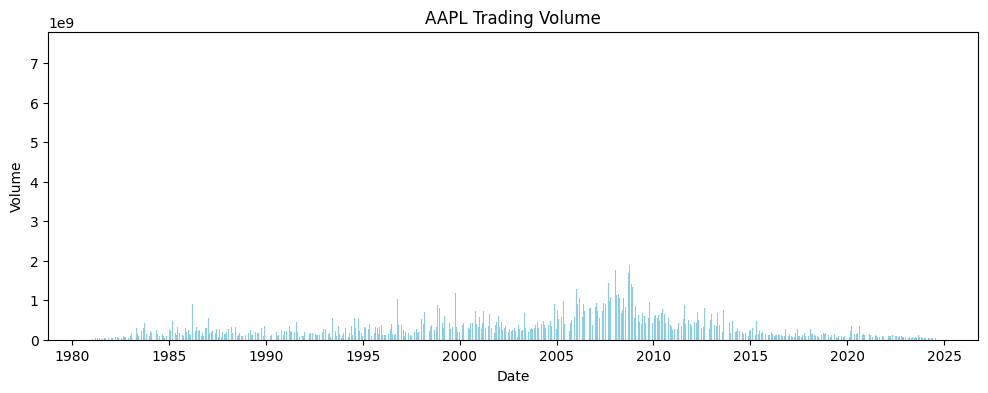

In [17]:

# Plot trading volume to identify spikes in trading activity
apple_TA.plot_volume()


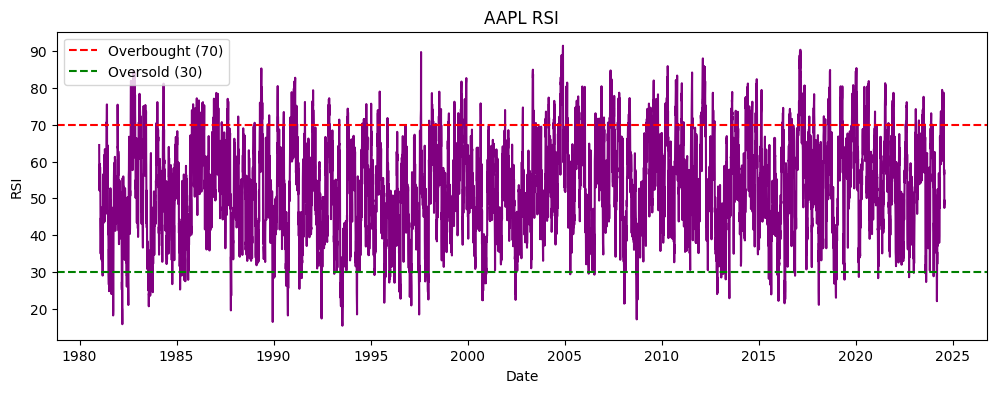

In [18]:

# Plot RSI indicator to see overbought/oversold conditions
apple_TA.plot_rsi()


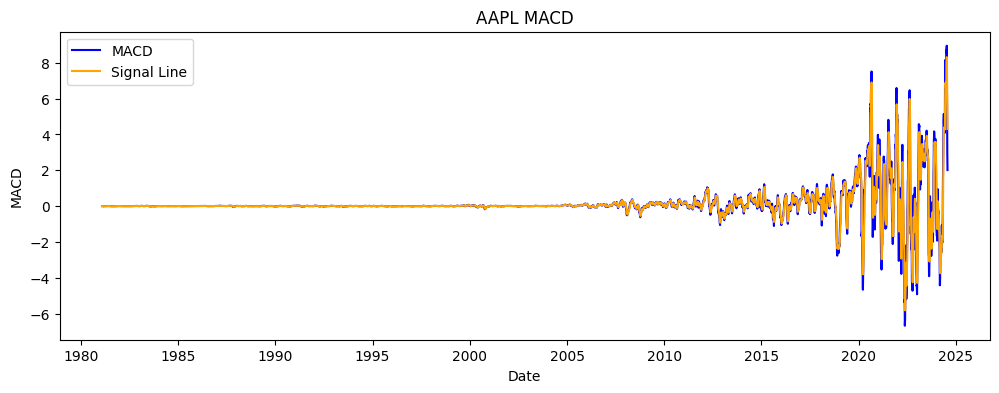

In [19]:

# Plot MACD indicator to see potential momentum shifts
apple_TA.plot_macd()


In [20]:

# Plot dividend payouts over time (if applicable)
apple_TA.plot_dividends()


No dividend data found.


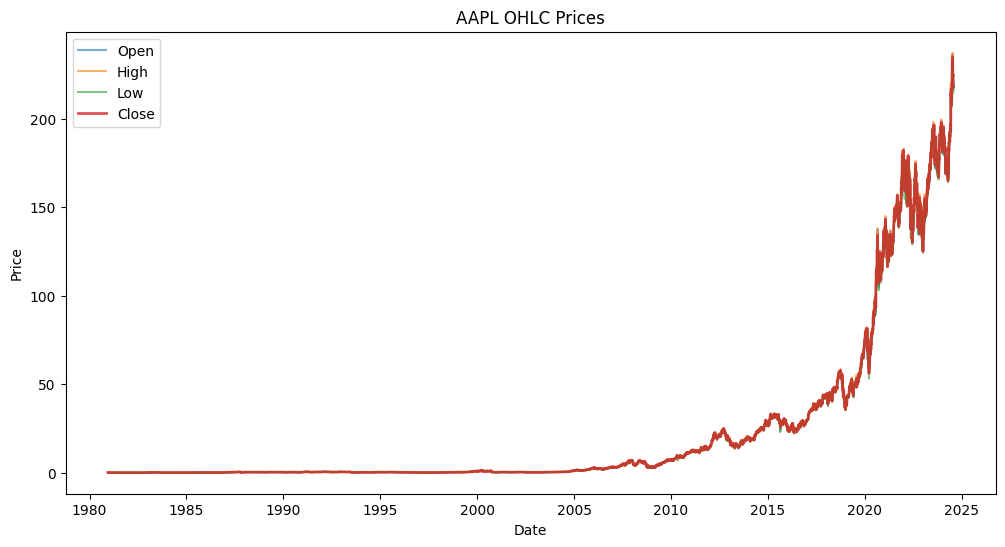

In [21]:

# Plot OHLC (open, high, low, close) prices as simple line plots
apple_TA.plot_ohlc_prices()


c:\Users\mike\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


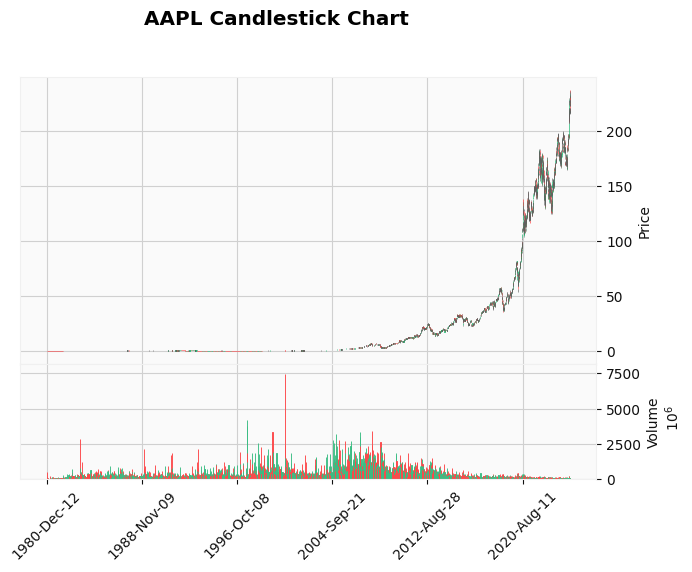

In [22]:

# Plot candlestick chart for clear visual of price movements
apple_TA.plot_candlestick()

In [6]:
# ================== Amazon (AMZN) =====================

# Adjust prices for stock splits if any
amazon_TA.adjust_for_splits()

# Compute daily returns for Amazon stock
amazon_TA.compute_daily_returns()

# Add technical indicators: Moving Averages (MA), RSI, MACD
amazon_TA.add_technical_indicators()


Adjusted for stock splits for AMZN.
Daily returns computed for AMZN.
Technical indicators added for AMZN.


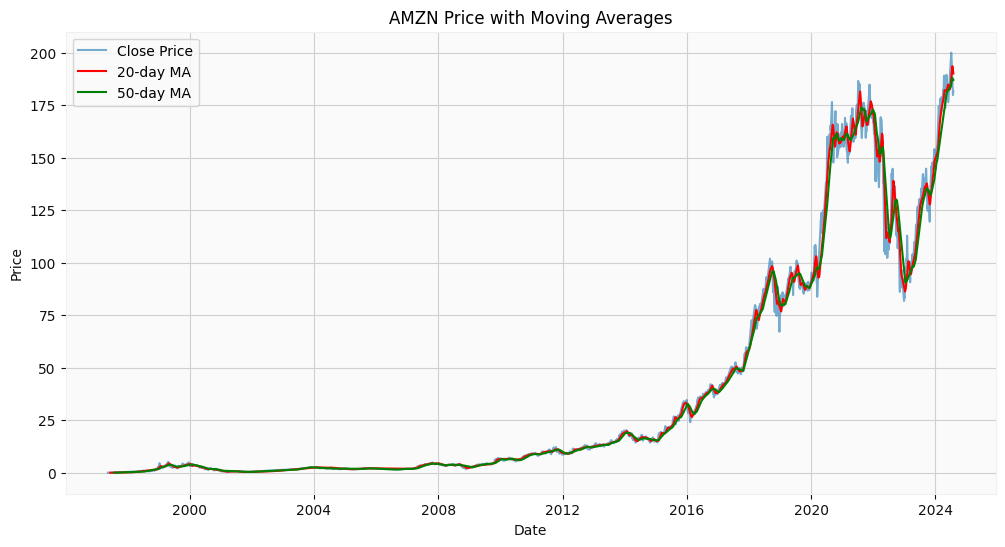

In [24]:
# Plot Amazon price with 20- and 50-day moving averages
amazon_TA.plot_price_and_ma()


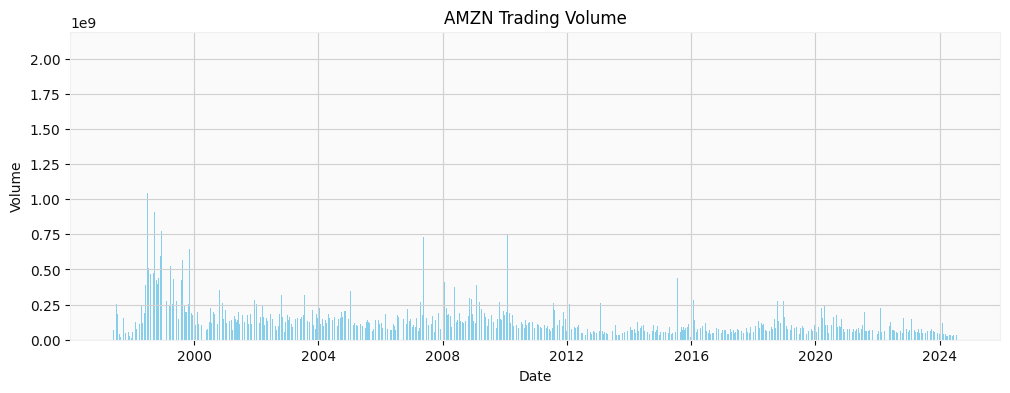

In [25]:
# Plot Amazon trading volume over time
amazon_TA.plot_volume()


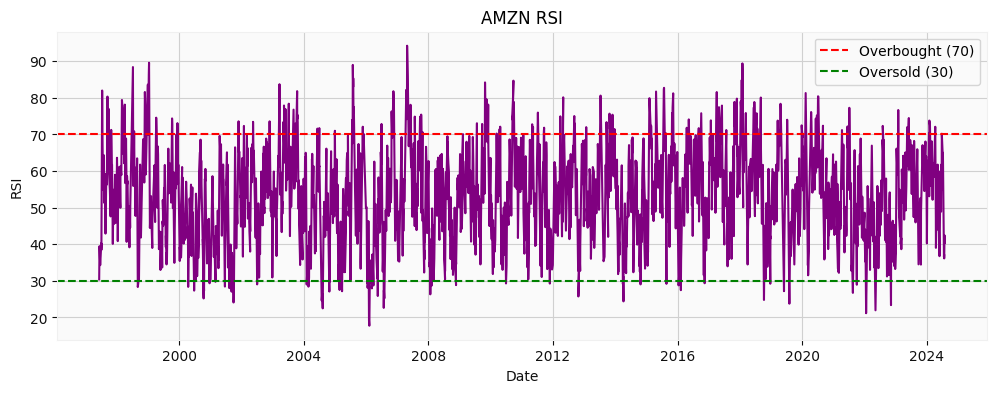

In [26]:
# Plot Amazon RSI to check overbought/oversold levels
amazon_TA.plot_rsi()


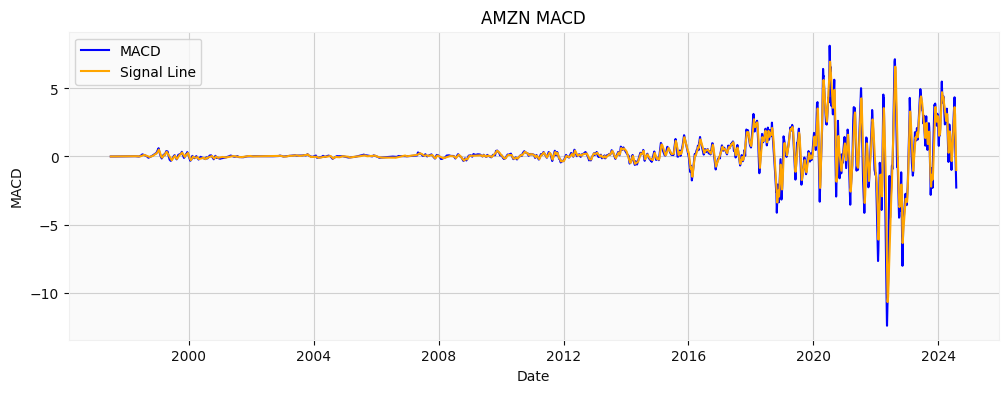

In [27]:
# Plot Amazon MACD for momentum insights
amazon_TA.plot_macd()


In [28]:
# Plot Amazon dividend payouts if available
amazon_TA.plot_dividends()


No dividend data found.


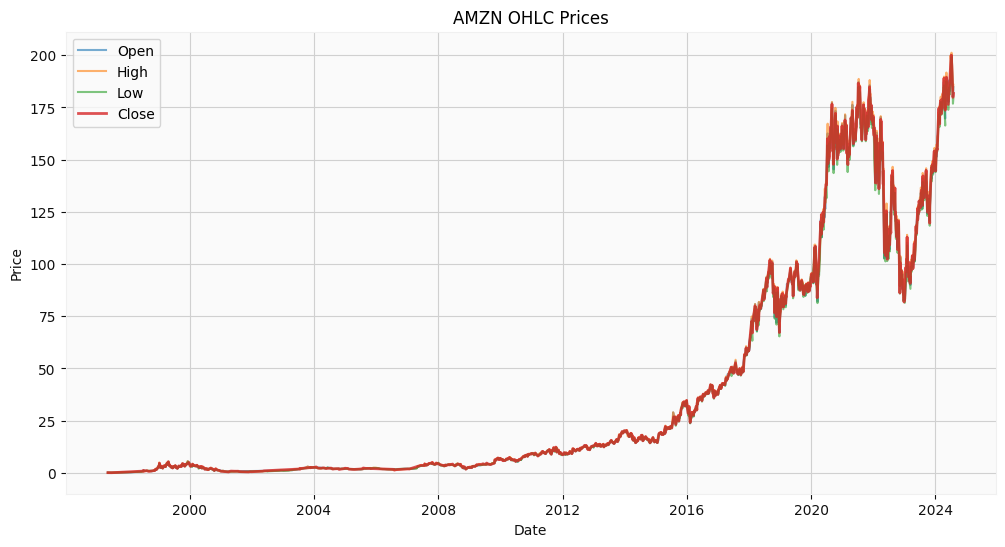

c:\Users\mike\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


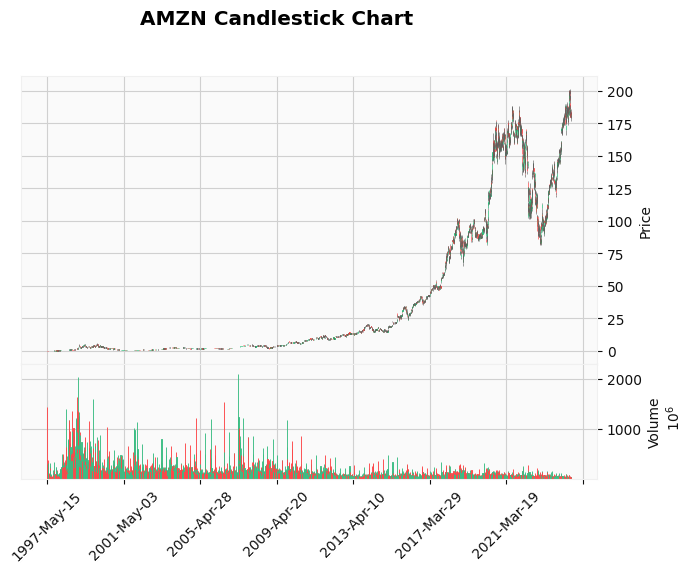

In [29]:
# Plot OHLC prices as line plots for Amazon
amazon_TA.plot_ohlc_prices()

# Plot candlestick chart for Amazon
amazon_TA.plot_candlestick()

In [7]:
# ================== Google (GOOG) =====================

# Adjust prices for stock splits if any
google_TA.adjust_for_splits()

# Compute daily returns for Google stock
google_TA.compute_daily_returns()

# Add technical indicators: Moving Averages (MA), RSI, MACD
google_TA.add_technical_indicators()


Adjusted for stock splits for GOOG.
Daily returns computed for GOOG.
Technical indicators added for GOOG.


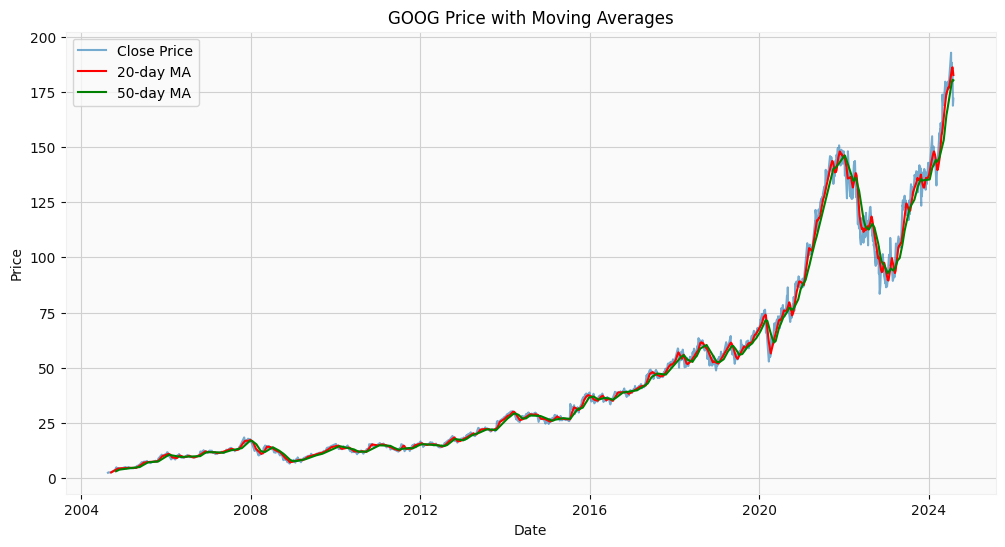

In [31]:
# Plot Google price with 20- and 50-day moving averages
google_TA.plot_price_and_ma()


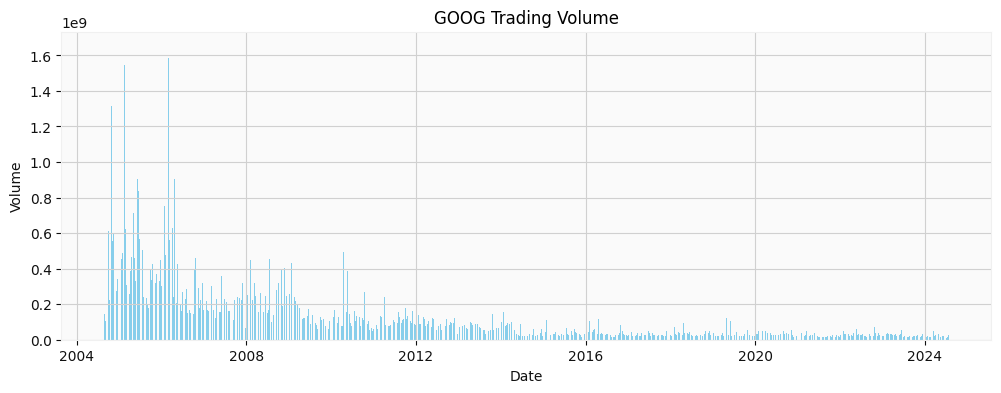

In [32]:
# Plot Google trading volume over time
google_TA.plot_volume()


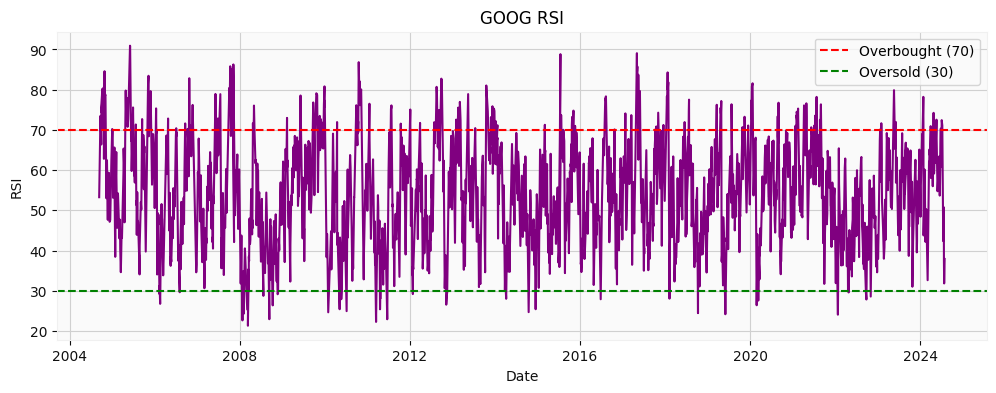

In [33]:
# Plot Google RSI to check overbought/oversold levels
google_TA.plot_rsi()


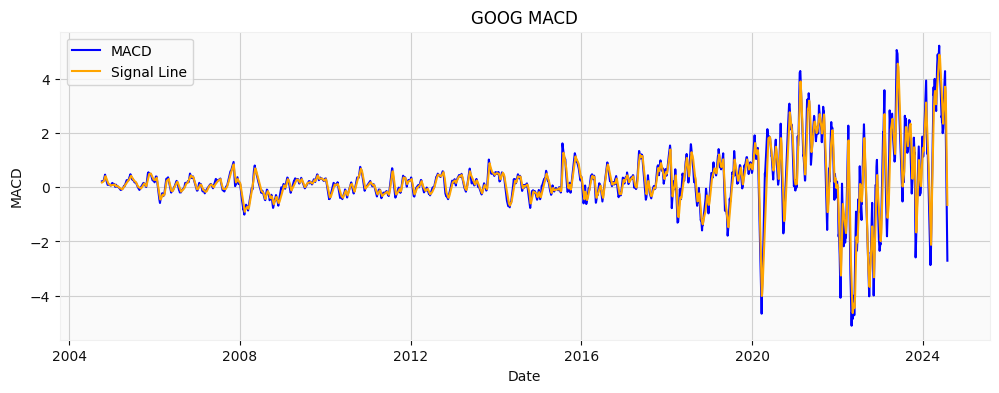

In [34]:
# Plot Google MACD for momentum insights
google_TA.plot_macd()


In [35]:
# Plot Google dividend payouts if available
google_TA.plot_dividends()


No dividend data found.


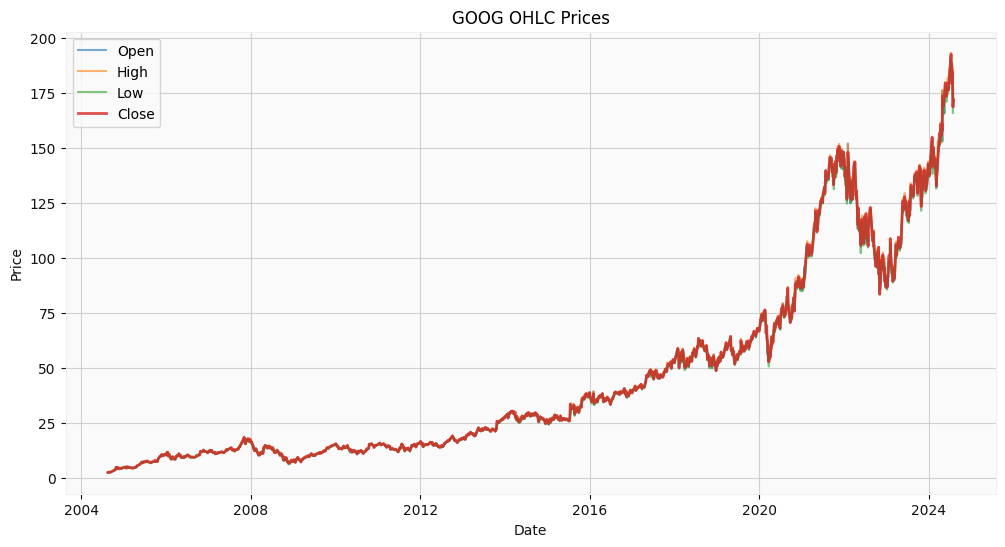

c:\Users\mike\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


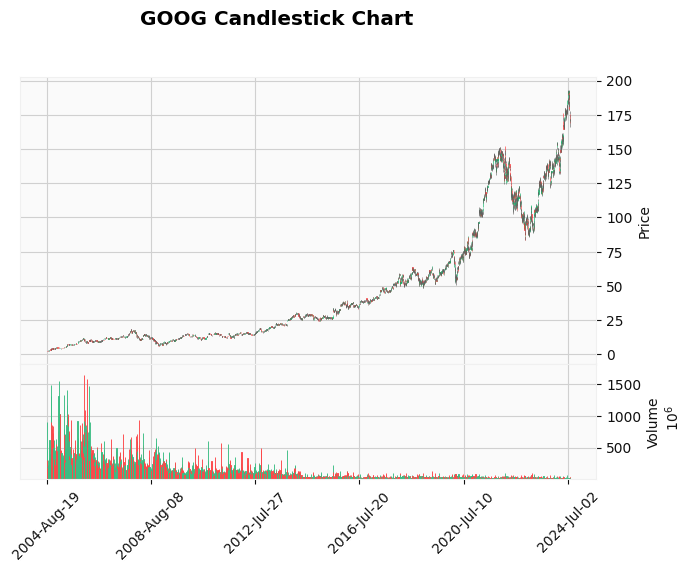

In [36]:
# Plot OHLC prices as line plots for Google
google_TA.plot_ohlc_prices()

# Plot candlestick chart for Google
google_TA.plot_candlestick()


In [8]:
# ================== Meta (META) =====================

# Adjust prices for stock splits if any
meta_TA.adjust_for_splits()

# Compute daily returns for Meta stock
meta_TA.compute_daily_returns()

# Add technical indicators: Moving Averages (MA), RSI, MACD
meta_TA.add_technical_indicators()


Adjusted for stock splits for META.
Daily returns computed for META.
Technical indicators added for META.


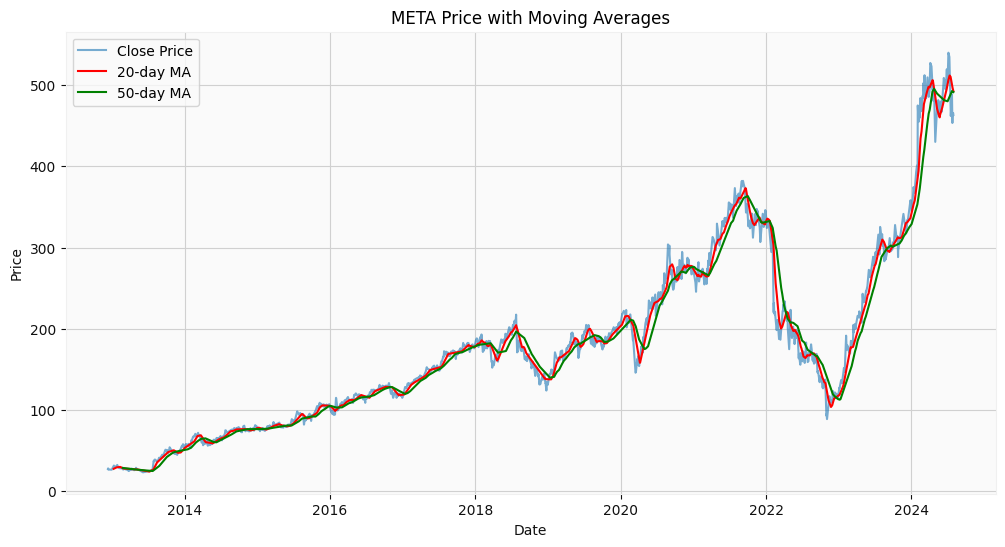

In [38]:
# Plot Meta price with 20- and 50-day moving averages
meta_TA.plot_price_and_ma()


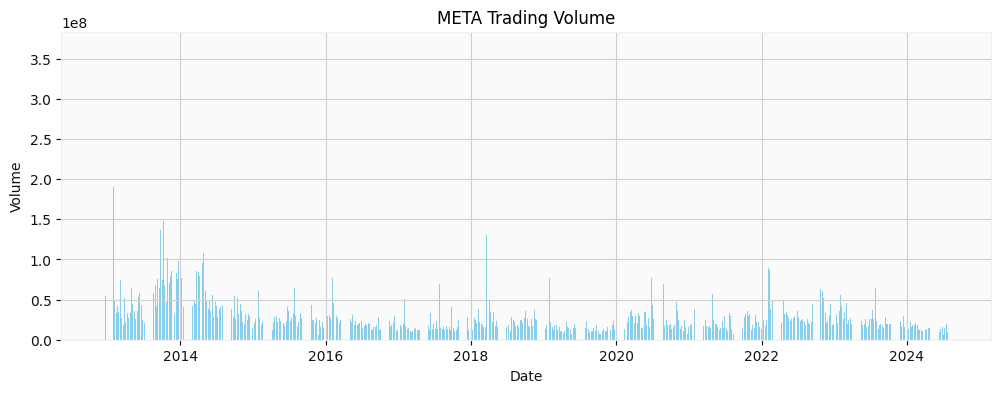

In [39]:
# Plot Meta trading volume over time
meta_TA.plot_volume()


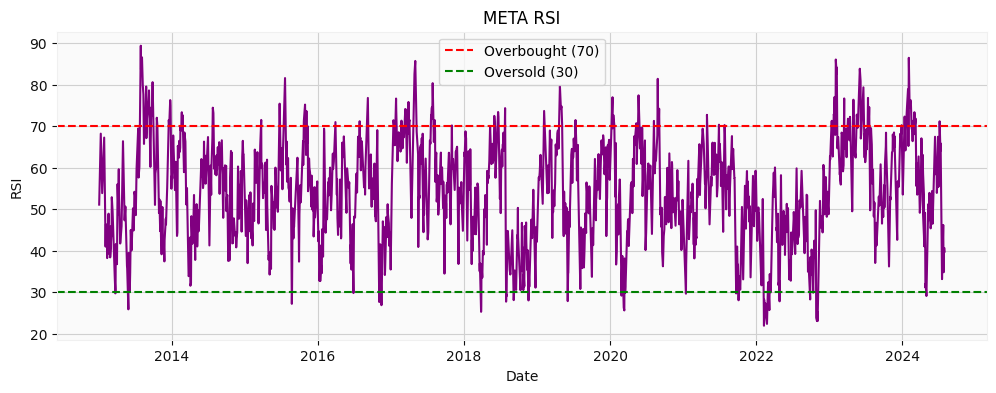

In [40]:
# Plot Meta RSI to check overbought/oversold levels
meta_TA.plot_rsi()


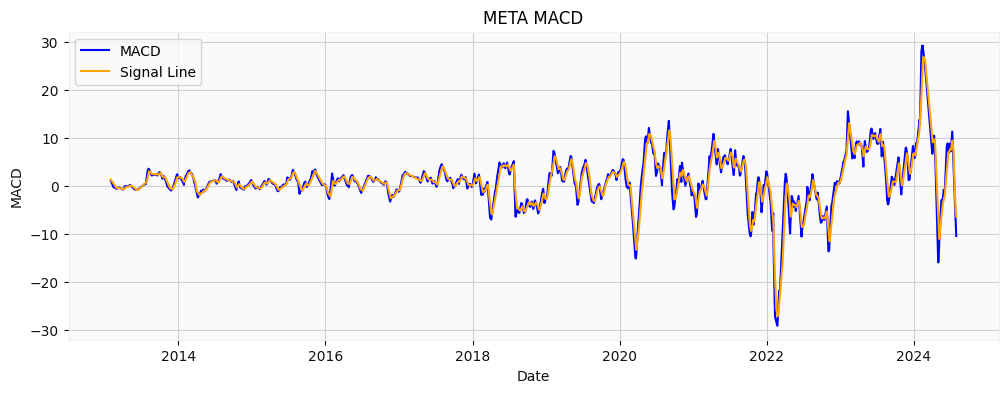

In [41]:
# Plot Meta MACD for momentum insights
meta_TA.plot_macd()


In [42]:
# Plot Meta dividend payouts if available
meta_TA.plot_dividends()


No dividend data found.


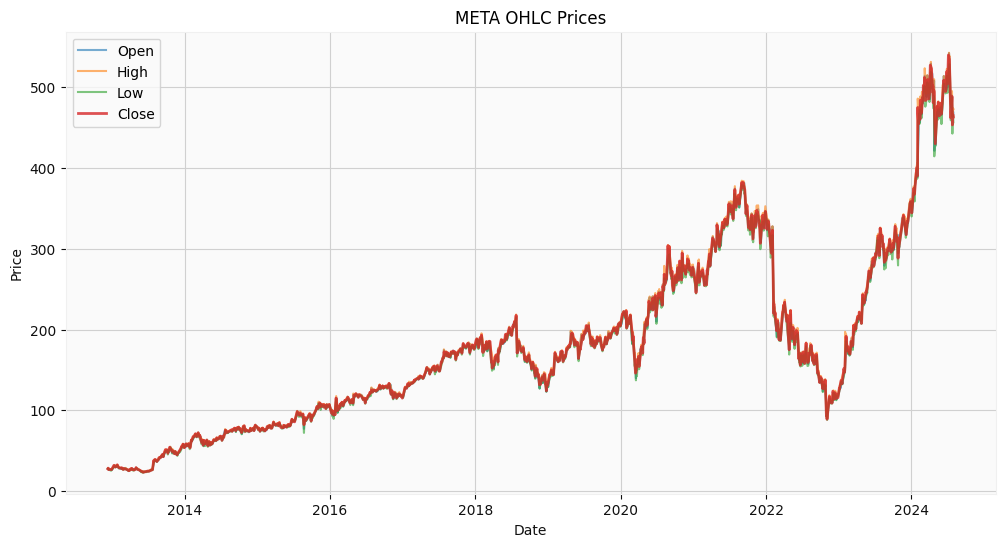

c:\Users\mike\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


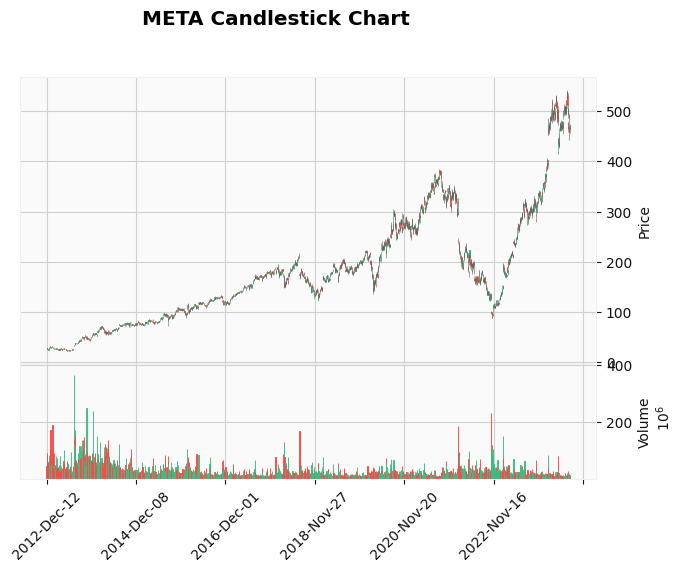

In [43]:
# Plot OHLC prices as line plots for Meta
meta_TA.plot_ohlc_prices()

# Plot candlestick chart for Meta
meta_TA.plot_candlestick()


In [9]:
# ================== Microsoft (MSFT) =====================

# Adjust prices for stock splits if any
microsoft_TA.adjust_for_splits()

# Compute daily returns for Microsoft stock
microsoft_TA.compute_daily_returns()

# Add technical indicators: Moving Averages (MA), RSI, MACD
microsoft_TA.add_technical_indicators()


Adjusted for stock splits for MSFT.
Daily returns computed for MSFT.
Technical indicators added for MSFT.


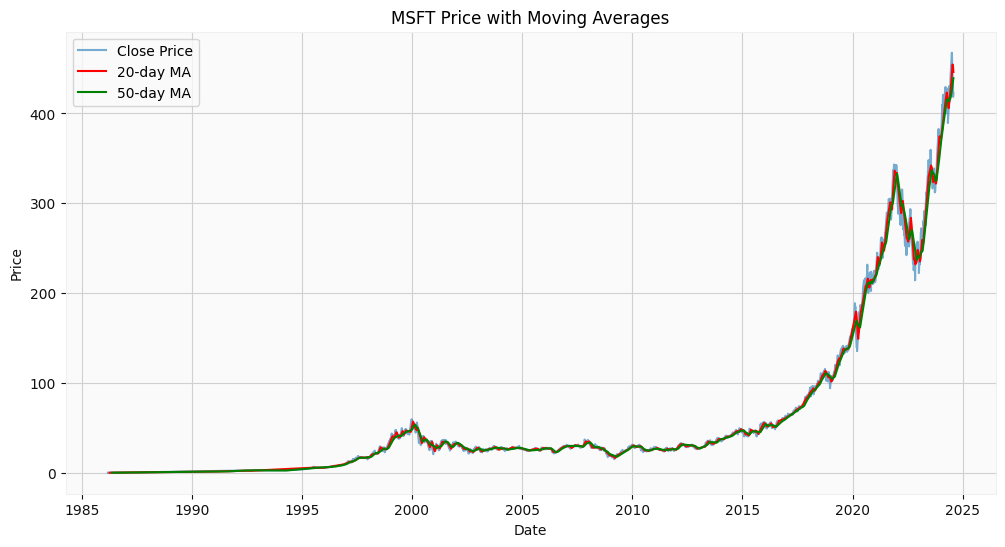

In [45]:
# Plot Microsoft price with 20- and 50-day moving averages
microsoft_TA.plot_price_and_ma()


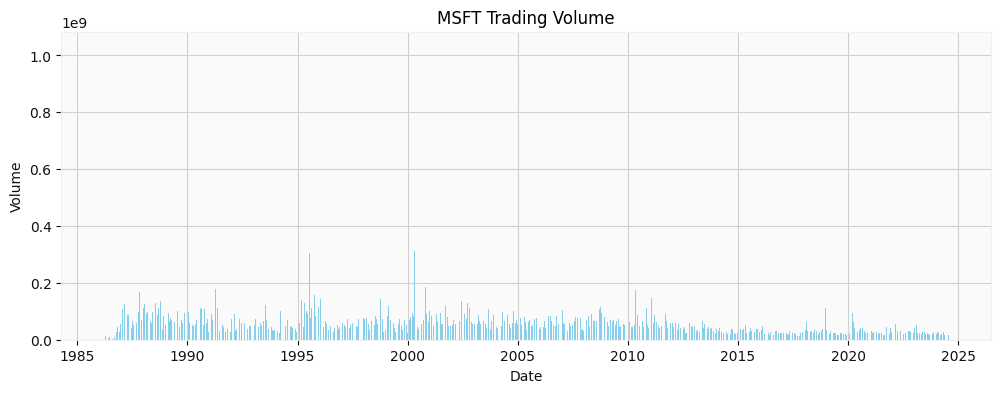

In [46]:
# Plot Microsoft trading volume over time
microsoft_TA.plot_volume()


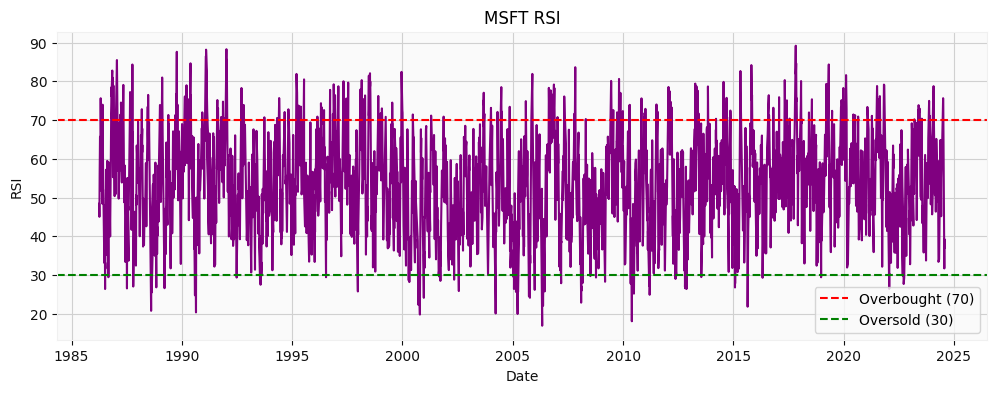

In [47]:
# Plot Microsoft RSI to check overbought/oversold levels
microsoft_TA.plot_rsi()


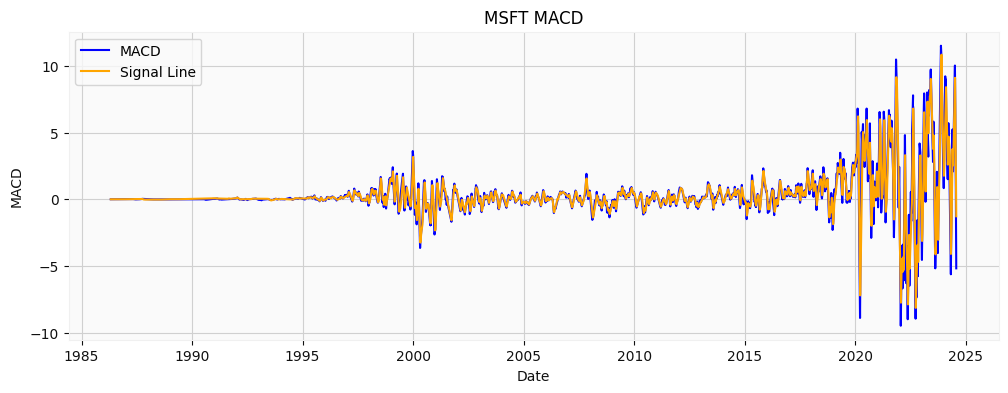

In [48]:
# Plot Microsoft MACD for momentum insights
microsoft_TA.plot_macd()


In [49]:
# Plot Microsoft dividend payouts if available
microsoft_TA.plot_dividends()


No dividend data found.


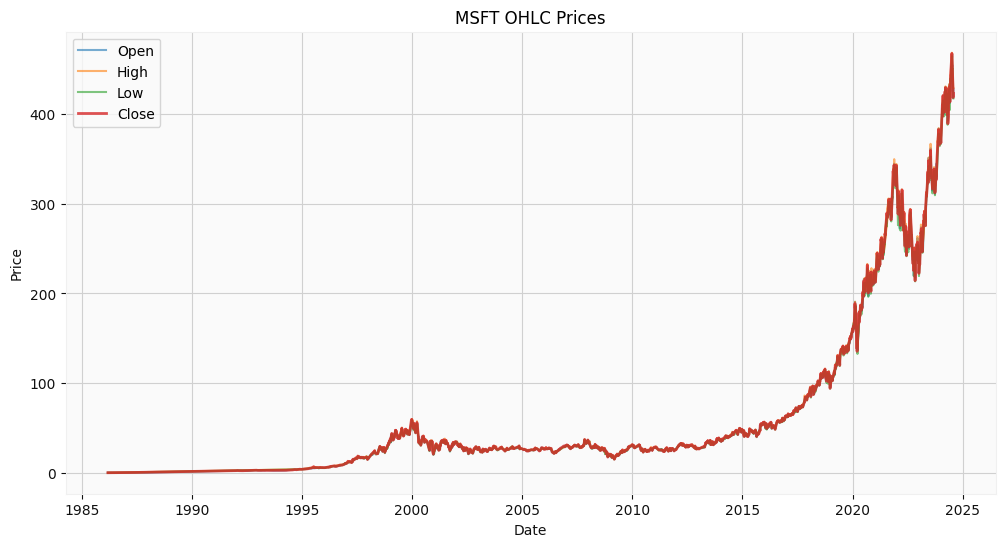

c:\Users\mike\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


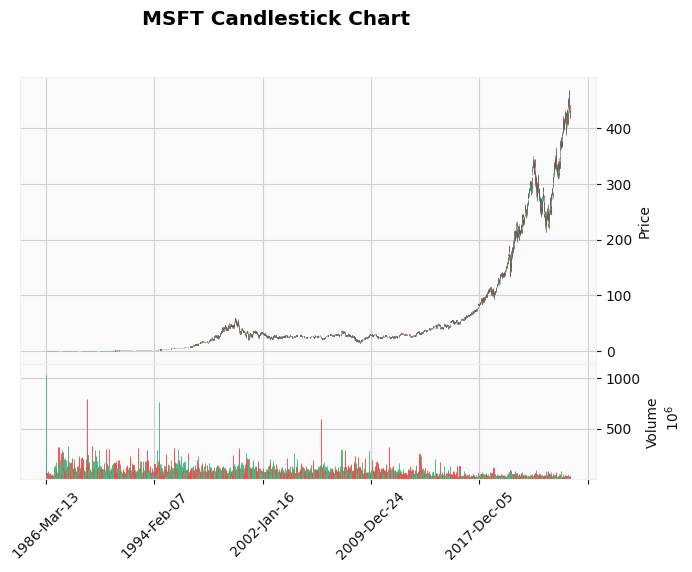

In [50]:
# Plot OHLC prices as line plots for Microsoft
microsoft_TA.plot_ohlc_prices()

# Plot candlestick chart for Microsoft
microsoft_TA.plot_candlestick()


In [10]:
# ================== Nvidia (NVDA) =====================

# Adjust prices for stock splits if any
nvidia_TA.adjust_for_splits()

# Compute daily returns for Nvidia stock
nvidia_TA.compute_daily_returns()

# Add technical indicators: Moving Averages (MA), RSI, MACD
nvidia_TA.add_technical_indicators()


Adjusted for stock splits for NVDA.
Daily returns computed for NVDA.
Technical indicators added for NVDA.


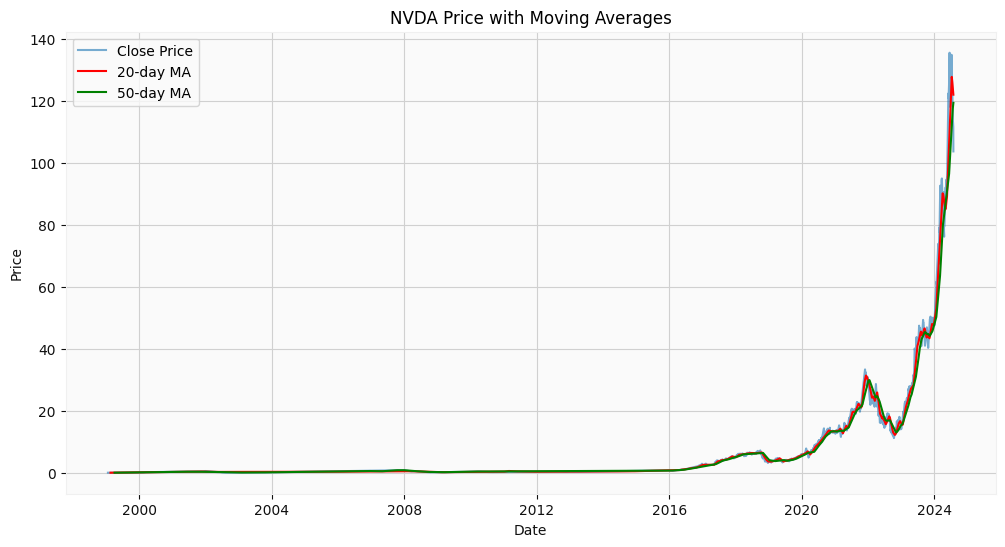

In [52]:
# Plot Nvidia price with 20- and 50-day moving averages
nvidia_TA.plot_price_and_ma()


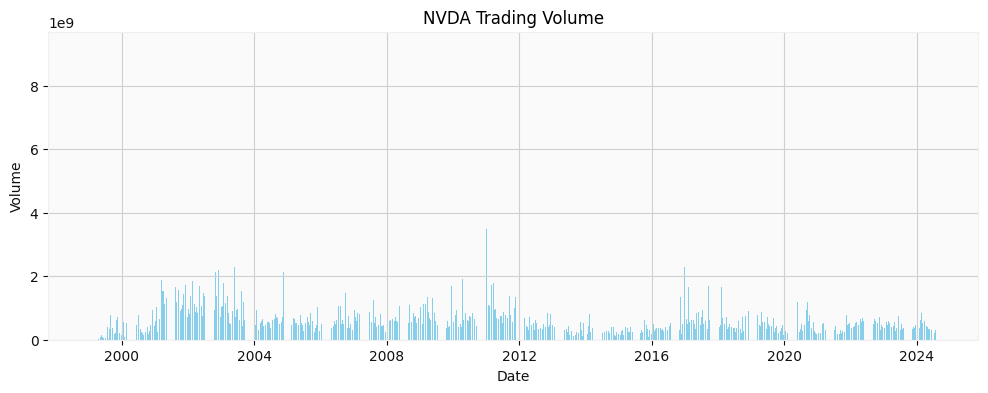

In [53]:
# Plot Nvidia trading volume over time
nvidia_TA.plot_volume()


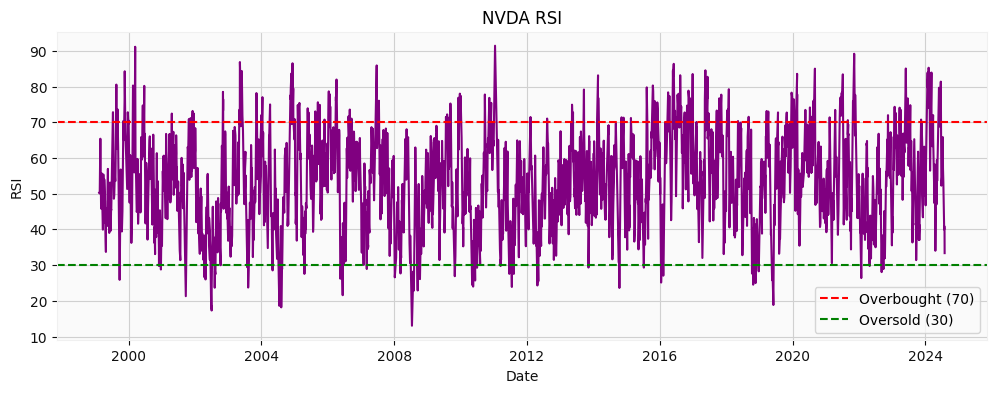

In [54]:
# Plot Nvidia RSI to check overbought/oversold levels
nvidia_TA.plot_rsi()


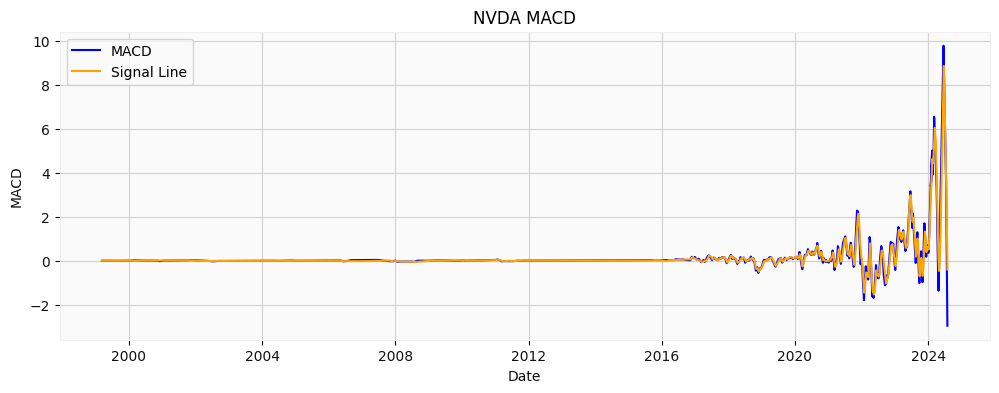

In [55]:
# Plot Nvidia MACD for momentum insights
nvidia_TA.plot_macd()


In [56]:
# Plot Nvidia dividend payouts if available
nvidia_TA.plot_dividends()


No dividend data found.


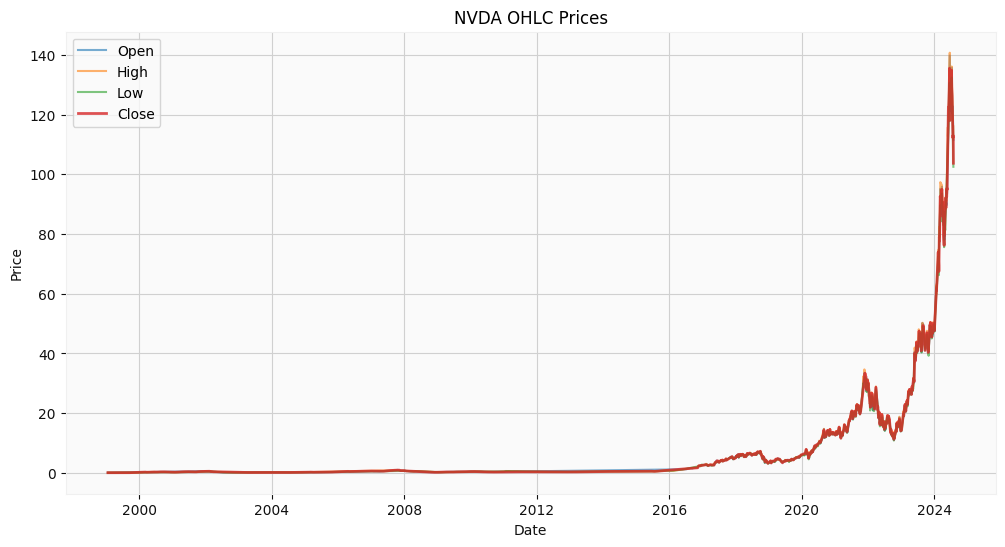

c:\Users\mike\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


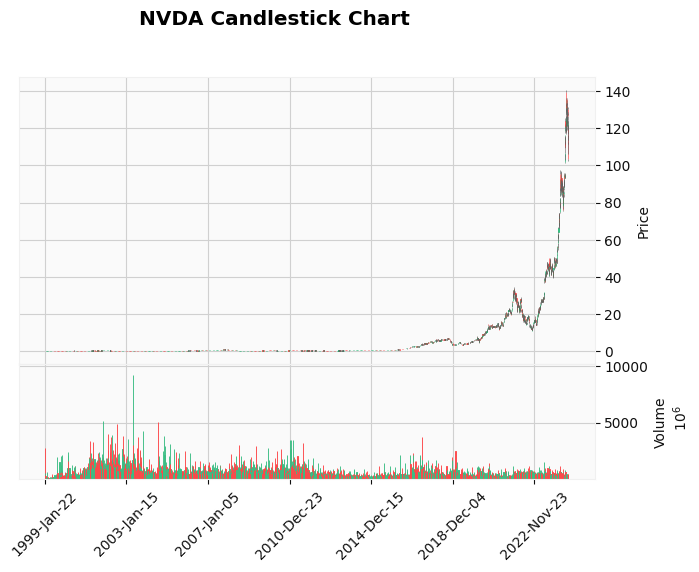

In [57]:
# Plot OHLC prices as line plots for Nvidia
nvidia_TA.plot_ohlc_prices()

# Plot candlestick chart for Nvidia
nvidia_TA.plot_candlestick()


In [11]:
# ================== Tesla (TSLA) =====================

# Adjust prices for stock splits if any
tesla_TA.adjust_for_splits()

# Compute daily returns for Tesla stock
tesla_TA.compute_daily_returns()

# Add technical indicators: Moving Averages (MA), RSI, MACD
tesla_TA.add_technical_indicators()


Adjusted for stock splits for TSLA.
Daily returns computed for TSLA.
Technical indicators added for TSLA.


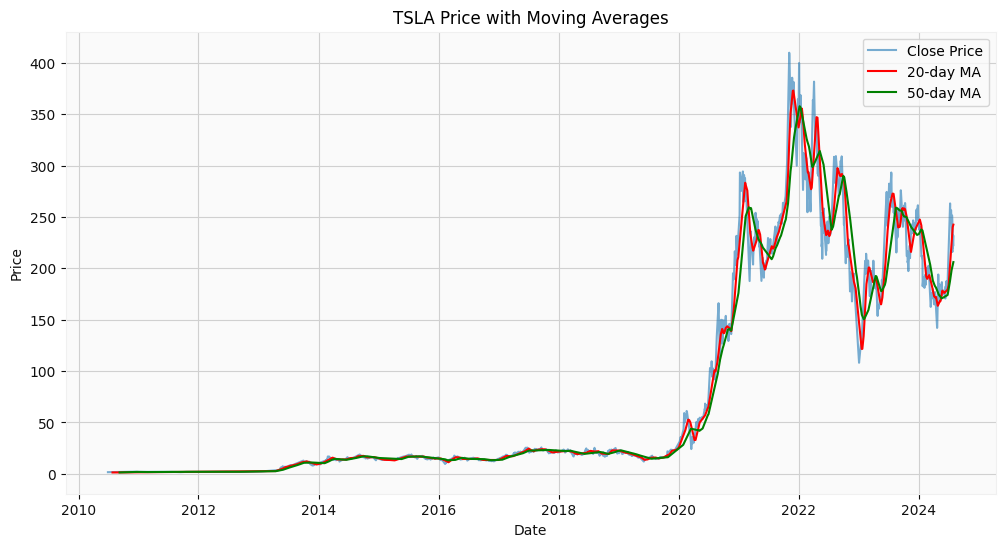

In [59]:

# Plot Tesla price with 20- and 50-day moving averages
tesla_TA.plot_price_and_ma()


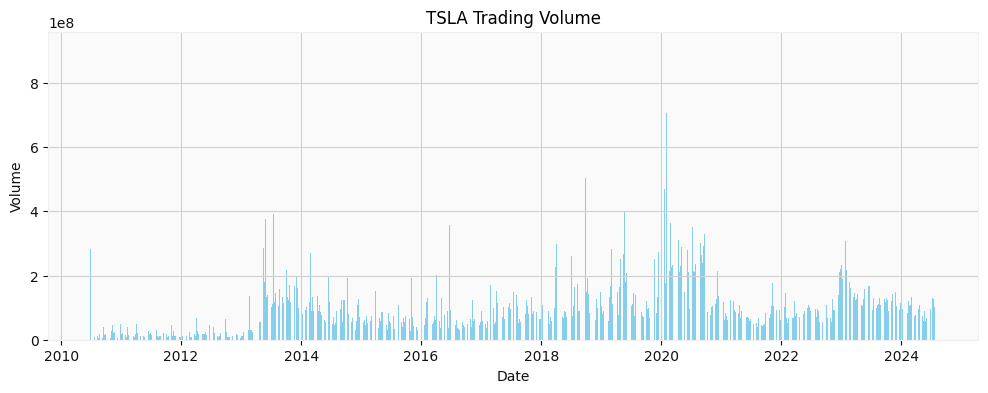

In [60]:
# Plot Tesla trading volume over time
tesla_TA.plot_volume()


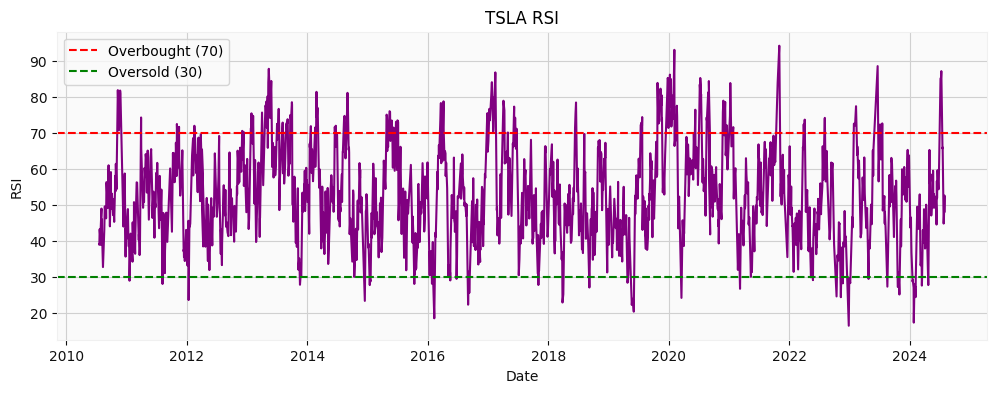

In [61]:
# Plot Tesla RSI to check overbought/oversold levels
tesla_TA.plot_rsi()


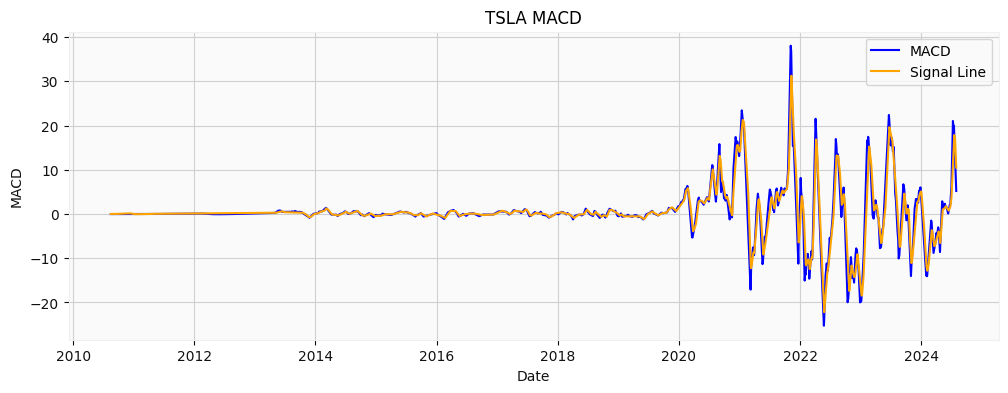

In [62]:
# Plot Tesla MACD for momentum insights
tesla_TA.plot_macd()


In [63]:
# Plot Tesla dividend payouts if available
tesla_TA.plot_dividends()


No dividend data found.


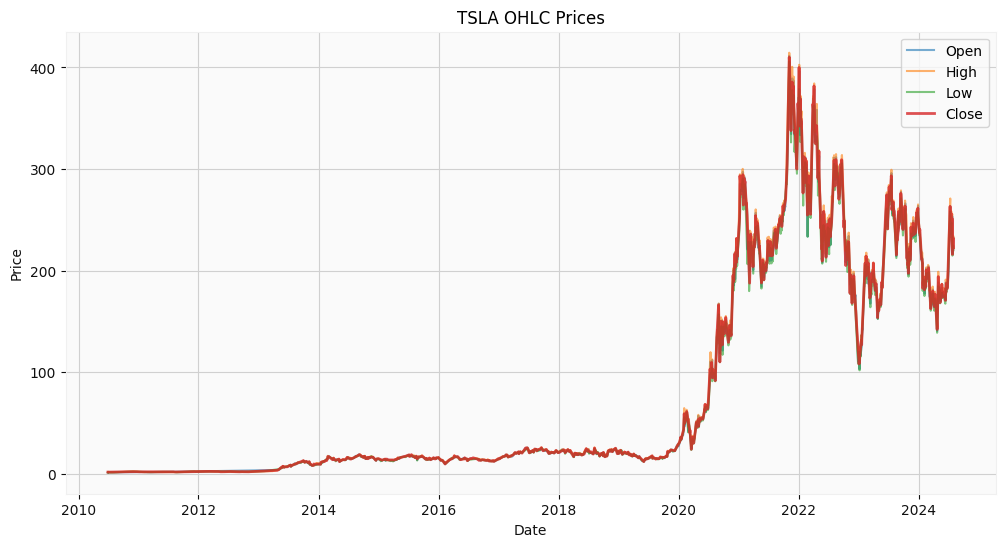

c:\Users\mike\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


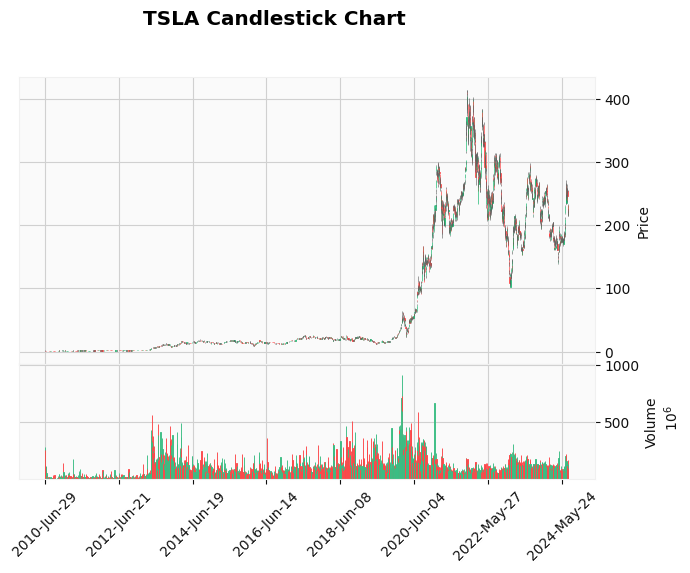

In [64]:
# Plot OHLC prices as line plots for Tesla
tesla_TA.plot_ohlc_prices()

# Plot candlestick chart for Tesla
tesla_TA.plot_candlestick()


In [65]:
apple_TA.get_data()
amazon_TA.get_data()
google_TA.get_data()
meta_TA.get_data()
microsoft_TA.get_data()
nvidia_TA.get_data()
tesla_TA.get_data()

,date,open,high,low,close,adj close,volume,dividends,stock splits,ticker,adjusted_close,daily_return,MA_20,MA_50,RSI,MACD,MACD_signal,MACD_hist
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,TSLA,1.592667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,TSLA,1.588667,-0.002511,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,TSLA,1.464000,-0.078473,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,TSLA,1.280000,-0.125683,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,TSLA,1.074000,-0.160937,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,TSLA,215.990005,-0.123346,237.924999,202.1838,44.886918,11.789291,15.873789,-4.084498
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,TSLA,220.250000,0.019723,239.118999,203.1510,46.951389,9.353206,14.569672,-5.216466
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,TSLA,219.800003,-0.002043,240.238000,203.9960,46.752165,7.302106,13.116159,-5.814053
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,TSLA,232.100006,0.055960,241.949000,205.1582,52.664511,6.593101,11.811547,-5.218447


In [12]:
apple_TA.df.to_csv('../data/new_AAPL_data.csv', index=False)
google_TA.df.to_csv('../data/new_GOOG_data.csv', index=False)
amazon_TA.df.to_csv('../data/new_AMZN_data.csv', index=False)
meta_TA.df.to_csv('../data/new_META_data.csv', index=False)
microsoft_TA.df.to_csv('../data/new_MSFT_data.csv', index=False)
nvidia_TA.df.to_csv('../data/new_NVDA_data.csv', index=False)
tesla_TA.df.to_csv('../data/new_TSLA_data.csv', index=False)
